# Exercise 3 - Supervised Learning


## From Theory to Practice: Classification Through Logistic Regression

#### Introduction
Goal: to derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1-e^x}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

We will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.


**a. What is the likelihood function of the data that we will wish to maximize?**

Basic likelihood functions can be denoted as follows:

$P(Y=1 | x_i,w) = \sigma(\mathbf{w}^T \mathbf{x}_i)$

$P(Y=0 | x_i,w) = 1- \sigma(\mathbf{w}^T \mathbf{x}_i)$

Transforming this to a basic probability function, 


$\prod_{}^{} p^{y} (1-p)^{1-y}$

= $P(Y | x_i, w) $

= $\prod_{}^{} \sigma(\mathbf{w}^T \mathbf{x}_i))^{y_i} (1- \sigma(\mathbf{w}^T \mathbf{x}_i))^{1-y_i}$

**b. Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).**

In regards to costs, if y = 1, then
- $f(x_i, w) = 0 $ = infinite cost
- $f(x_i, w) = 1$ = no cost

Similarly, if y = 0, then
- $f(x_i, w) = 0$ = no cost
- $f(x_i, w) = 1$ = infinite cost


We can consider the following, and vice versa for inverse behavior : 

- When $y = 1$, cost $\rightarrow$ 0  if $f(x_i, w) = 1$
- When $y = 0$, cost $\rightarrow \infty$  if $f(x_i, w) =1$


Therefore, using the negativity for inverse purposes, 

Cost of $f(x_i, w), y = \begin{cases}
                -log(f(x_i,w))           & y = 1  \\
                -log(1-(f(x_i,w))         & y = 0
            \end{cases}$


Adapting this back into the likelihood function $\prod_{}^{} \sigma(\mathbf{w}^T \mathbf{x}_i))^{y_i} (1- \sigma(\mathbf{w}^T \mathbf{x}_i))^{1-y_i}$, we get the following:

$-(Z) log(\sigma(\mathbf{w}^T \mathbf{x}_i)) - (Z) log(1-\sigma(\mathbf{w}^T \mathbf{x}_i))$

To estimate the weight (Z in above equation), input classification output, converting the above to

Cost = $-y(log(\sigma(\mathbf{w}^T \mathbf{x}_i)) - (1-y)(log(1-\sigma(\mathbf{w}^T \mathbf{x}_i)))$ for a single entry.

Expanding this single entry, we get

Total Cost =  $\sum_{n=1}^{n} -y[log(\sigma(\mathbf{w}^T \mathbf{x}_i))] - (1-y)[log(1-\sigma(\mathbf{w}^T \mathbf{x}_i))]$

and

$C(w)$ = $\frac{1}{n}\sum_{n=1}^{n} -y[log(\sigma(\mathbf{w}^T \mathbf{x}_i))] - (1-y)[log(1-\sigma(\mathbf{w}^T \mathbf{x}_i))]$

**c. Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.**


$\frac{\partial C}{\partial w_0} = \frac{1}{n} \sum_{i=1}^{n} \left[\sigma(w_0 x_{i,0}) - y_i\right] x_{i,0}$

$\frac{\partial C}{\partial w_1} = \frac{1}{n} \sum_{i=1}^{n} \left[\sigma(w_1 x_{i,1}) - y_i\right] x_{i,1}$

$\frac{\partial C}{\partial w_2} = \frac{1}{n} \sum_{i=1}^{n} \left[\sigma(w_2 x_{i,2}) - y_i\right] x_{i,2}$

**d. Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.**

$w_i := w_i - \eta \frac{1}{n} \sum_{i=1}^{n} \left[\sigma(w_i x_{i}) - y_i\right] x_{i}$

**e. Load, plot, and comment on data.**

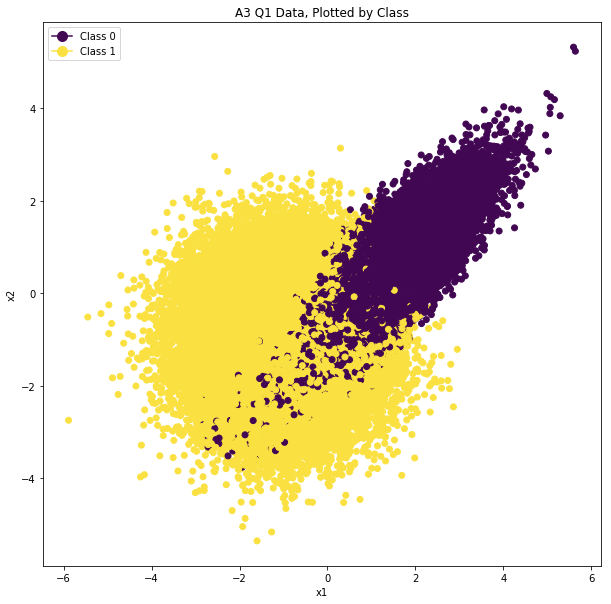

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


# Load data
A3_Q1_data = 'https://raw.githubusercontent.com/kylebradbury/ids705/master/assignments/data/A3_Q1_data.csv'
df = pd.read_csv(A3_Q1_data)

# Input plotting details
cmap_light = ListedColormap(['#bb95c5', '#f4eec5'])
cmap_bold = ListedColormap(['#420752', '#fae141'])


legend_elements = [Line2D([0], [0], marker='o', color='#420752', label='Class 0', markersize=10),
                   Line2D([0], [0], marker='o', color='#fae141', label='Class 1', markersize=10)]


fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

# Plot

ax.scatter(df['x1'], df['x2'], c = df['y'], cmap=cmap_bold)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('A3 Q1 Data, Plotted by Class')
ax.legend(handles=legend_elements, loc='upper left')
plt.show()


Logistic regression may be a suitable classification method in regards to the above data, as the boundary seems to have the same shape as a regular sigmoid function. The difficulty may come in the separability, which seems to impact about half of the purple points. 

**f. Potential Data Preprocessing.**

In [22]:
df.isnull().sum().sum()

0

There are no null values in the dataset. While there may be scale differences, as mentioned when commenting on the plotted data, the logistic regression may account for this and there may not be a need to standardize points at this time. 

**g. Logistic Regression Implementation Function**

In [23]:
from math import exp
import numpy as np
 

# Convert dataframe to array for ease of use
df2 = df.values
df2


# Create predict function; return sigmoid 
def initialPredict(row, coeffs):
    yhat = coeffs[0]
    for i in range(len(row)-1):
        # Attaching w coeffs to their respective x values in dataset
        yhat += coeffs[i + 1] * row[i]
    return( 1.0 / (1.0 + exp(-yhat)))

# Create basic predictor output
def secondaryPredict(dataframe, coeffs):
    for row in dataframe:
        yhat = predict(row, coeffs)
        print('Expected = {}, Predicted = P(1 = {:.3f}|0 = {:.3f})'.format(row[-1], yhat, 1-(yhat)))
    
###### Example with placeholder coefficients

# Instantiate weight coefficients   
coeffs = [0.1, 0.2, 0.3]

# Print initial predictions, with class confidence probabilities listed with expected class
#testPred = secondaryPredict(df2, weights)

**h. Logistic Regression Cost Function Implementation.** 

In [24]:
def cost_function(dataframe, coeffs):
    # Find n value
    n = len(dataframe)
    
    # Pull out class labels from dataset
    for row in dataframe:
        classes = row[-1]
    
    # Create predictions
    yhat = initialPredict(row, coeffs)
    
    # Class 1 cost = -y*log(yhat)
    class1Cost = -classes*np.log(yhat)
    
    # Class 0 cost = (1-y)*log(1-yhat)
    class0Cost = (1-classes)*np.log(1-yhat)
    
    # Average class costs
    avgCost = (class1Cost + class0Cost) / n
    print(avgCost)

# Average cost for current coefficients
cost_function(df2, coeffs)

1.2124268898372835e-05



**i, j. Create functions to run gradient descent on training data; estimate cost function results for both training and test.**


In [25]:
from math import exp
import numpy as np
from sklearn.model_selection import train_test_split

def initialPredict(row, coeffs):
    yhat = coeffs[0]
    for i in range(len(row)-1):
        # Attaching w coeffs to their respective x values in dataset
        yhat += coeffs[i + 1] * row[i]
    return( 1.0 / (1.0 + exp(-yhat)))

def cost_function(dataset, coeffs):
    n = len(dataset)
    for row in dataset:
        classes = row[-1]
    yhat = initialPredict(row, coeffs)
    class1Cost = -classes*np.log(yhat)
    class0Cost = (1-classes)*np.log(1-yhat)
    avgCost = (class1Cost + class0Cost) / n
    return(avgCost) 

# Estimate logistic regression coefficients using stochastic gradient descent
def gd_descent(data, learning, epochs, coef):
    for epoch in range(epochs):
        sum_error = 0
        cost = 0
        for row in data:
            yhat = initialPredict(row, coef)
            error = row[-1] - yhat
            cost = cost_function(data, coef)
            sum_error += error**2
            coef[0] = coef[0] + (learning*error*yhat*(1.0 - yhat))
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] + (learning * error * yhat * (1.0 - yhat) * row[i])
        print('epoch={}, learning_rate={:.3f}, error={:.3f}, cost={:.2e}'.format(epoch, learning, sum_error, cost))
    return coef


In [27]:
##################### Split dataset into 5000 first - JUPYTER FILE OVERLOAD 70% training
newdf, newdftest = train_test_split(df2, test_size = 0.84, random_state=40)

##################### Split dataset into 70% training
train, test = train_test_split(newdf, test_size = 0.3, random_state=40)

######## Test gradient descent on training & test set - costs listed for each iteration
learning = 0.015
epochs = 5
coef = [0.1, 0.3, 0.4]
print('Training Data - Gradient Descent with Costs Resulting from Cost Function per Epoch\n')
trainingDescent = gd_descent(train, learning, epochs, coef)
print('\nTestData - Gradient Descent with Costs Resulting from Cost Function per Epoch\n')
testingDescent = gd_descent(test, learning, epochs, coef)

epoch=0, learning_rate=0.015, error=1264.335, cost=2.12e-05
epoch=1, learning_rate=0.015, error=1150.099, cost=1.92e-05
epoch=2, learning_rate=0.015, error=1148.664, cost=1.85e-05
epoch=3, learning_rate=0.015, error=1148.514, cost=1.82e-05
epoch=4, learning_rate=0.015, error=1148.502, cost=1.81e-05
epoch=0, learning_rate=0.015, error=489.080, cost=-3.46e-07
epoch=1, learning_rate=0.015, error=488.888, cost=-3.70e-07
epoch=2, learning_rate=0.015, error=488.831, cost=-3.84e-07
epoch=3, learning_rate=0.015, error=488.809, cost=-3.92e-07
epoch=4, learning_rate=0.015, error=488.801, cost=-3.97e-07


**k. Impact of different learning rates as a function of epochs. ** 

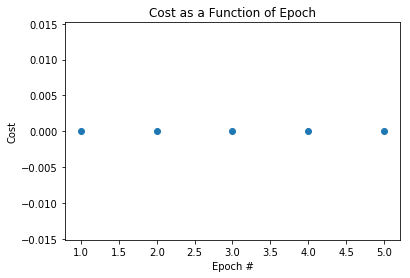

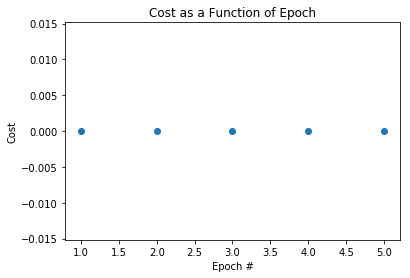

In [30]:
# Plot epoch x Cost function
def gd_descent_plot(data, learning, epochs, coef):
    plotepoch = [1,2,3,4,5]
    plotcost = []
    for epoch in range(epochs):
        sum_error = 0
        cost = 0
        for row in data:
            yhat = initialPredict(row, coef)
            error = row[-1] - yhat
            cost = cost_function(data, coef)
            sum_error += error**2
            coef[0] = coef[0] + (learning*error*yhat*(1.0 - yhat))
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] + (learning * error * yhat * (1.0 - yhat) * row[i])
        plotcost.append(cost)
    plt.scatter(plotepoch,plotcost)
    plt.xlabel('Epoch #')
    plt.ylabel('Cost')
    plt.title('Cost as a Function of Epoch')
    plt.show()
  
    
######## Plot gradient descent with training & test set - costs listed for each iteration
learning = 0.015
epochs = 5
coef = [0.1, 0.3, 0.4]

trainingDescent = gd_descent(train, learning, epochs, coef)
testingDescent = gd_descent(test, learning, epochs, coef)
print('Training Data - Gradient Descent with Costs Resulting from Cost Function per Epoch\n')
trainingDescent = gd_descent_plot(train, learning, epochs, coef)
print('Test Data - Gradient Descent with Costs Resulting from Cost Function per Epoch\n')
testingDescent = gd_descent_plot(test, learning, epochs, coef)

I began with random assignments for each of the three coefficients and the learning rate. Using the results of the cost function per epoch, I found that after epoch 4, the cost function did not seem to be decreasing by a significant amount. This led me to believe that the coefficients found in epoch 5 were the most eligible of those before it. 

**l. Make two plots with decision boundaries. Based on sklearn classifier, for both test and training.**



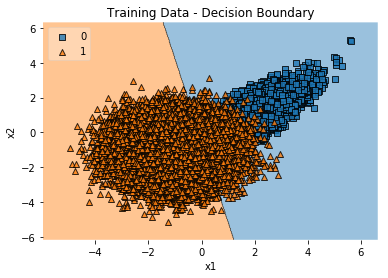

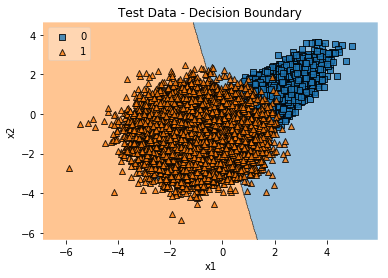

In [68]:
#pip install mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Load data
A3_Q1_data = 'https://raw.githubusercontent.com/kylebradbury/ids705/master/assignments/data/A3_Q1_data.csv'
df = pd.read_csv(A3_Q1_data)
df = df.values


# Plotting

# Split training data
train, test = train_test_split(df, test_size = 0.3, random_state=40)

# Split into X, y
X_train = train[:,:2]
y_train = train[:,[-1]]
y_train2 = y_train.astype(np.integer)
y_train3 = y_train2.ravel()

X_test = test[:,:2]
y_test = test[:,[-1]]
y_test2 = y_test.astype(np.integer)
y_test3 = y_test2.ravel()


# Train logisitic regression classifier
logreg = LogisticRegression()
logregfit = logreg.fit(X_train,y_train3)

# Plot decision regions
plot_decision_regions(X_train,y_train3, clf=logreg, legend=2)


# Adding axes annotations
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training Data - Decision Boundary')
plt.show()

# Plot test data on trained classifier
trainfit = logreg.fit(X_test, y_test3)

# Plot decision regions
plot_decision_regions(X_test, y_test3, clf=logreg, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test Data - Decision Boundary')
plt.show()

The trained decision boundary seems to work better on the test data than the training data. This could be due to a number of things. As the data overlaps, the boundary is understandably not perfect. To improve this, a non-linear boundary would be necessary. To achieve this, we may want to use a knn classifier, or another non-parametric method. 

** m. Compare ROC curve of created model to random guessing.**


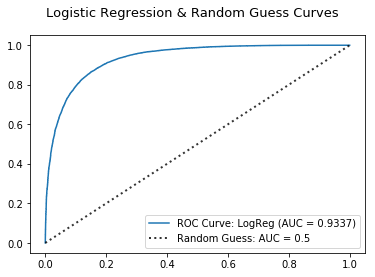

In [83]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import Grid

from sklearn.metrics import roc_curve,auc,precision_recall_curve,average_precision_score
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression



######### Classifier #1 : Logistic Regression

logreg = LogisticRegression()
logregfit = logreg.fit(X_train,y_train3)
y_probs = logregfit.predict_proba(X_test)


# ROC
falsepos, truepos, thresh = roc_curve(y_test, y_probs[:,1])
roc_auc = auc(falsepos, truepos)
plt.plot(falsepos, truepos, label='ROC Curve: LogReg (AUC = {:0.4f})'.format(roc_auc))


# Random Guess
plt.plot([0, 1], [0, 1], linestyle=':', lw=2, color='k',label='Random Guess: AUC = 0.5', alpha=.8)

plt.suptitle('Logistic Regression & Random Guess Curves', fontsize=13)
plt.legend()
plt.show()

Using the input module, we can see that the AUC is approx. 0.9337, which is much higher than the random guess AUC at 0.5. Assuming that the self-created model was able to be implemented, one would assume the AUC would be less than 0.9337 but higher than 0.5. 

## Digits Classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

a. Dataset of MNIST digits constructed. 
	New binary target variables created to input any images 
	of the number 3 to class 1, and all others to class 0.

b. 10 samples of each class, plotted below.



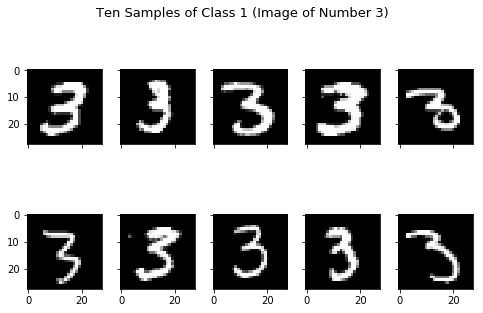

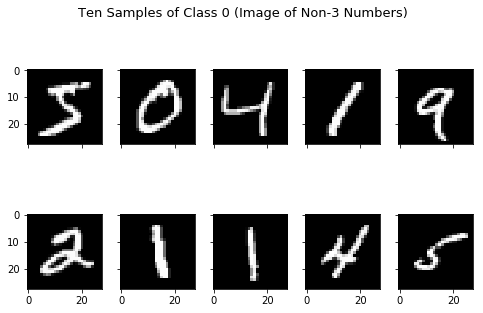

In [5]:
#pip install keras, tensorflow
import pandas as pd
import numpy as np
from keras.datasets import mnist

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import Grid
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

################################### a. Construct dataset

# Import Data
(X_tr, y_train), (X_te, y_test) = mnist.load_data()

# Reshape X Data
X_train = np.reshape(X_tr,(60000,-1))
X_test = np.reshape(X_te,(10000,-1))

# Create new y arrays with binary target variable 
y_binary_train = np.where(y_train== 3, 1, 0)
y_binary_test = np.where(y_test==3, 1, 0)

# Check binary values in train and test
np.unique(y_binary_train)
np.unique(y_binary_test)

print('a. Dataset of MNIST digits constructed. \n\tNew binary target variables created to input any images \n\tof the number 3 to class 1, and all others to class 0.')


################################### b. Plot 10 of class 0; 10 of class 1

print('\nb. 10 samples of each class, plotted below.\n')


# Instantiate fig size, properties for class 0
fig = plt.figure(figsize=(8, 5))
grid = Grid(fig, rect=111, nrows_ncols=(2,5), axes_pad=0.25, label_mode='L')
fig.suptitle('Ten Samples of Class 1 (Image of Number 3)', fontsize=13)

n = 0
for i in range(X_train.shape[0]):
    if n < 10:
        if y_binary_train[i,] == 1:
            image = X_train[i,:]
            image = np.array(image, dtype='float')
            pixels = image.reshape((28, 28))
            grid[n].imshow(pixels, cmap='gray')
            n += 1
        else:
            pass
        pass
    else:
        plt.show()
        
# Instantiate fig size, properties for class 1
fig = plt.figure(figsize=(8, 5))
grid = Grid(fig, rect=111, nrows_ncols=(2,5), axes_pad=0.25, label_mode='L')
fig.suptitle('Ten Samples of Class 0 (Image of Non-3 Numbers)', fontsize=13)

n = 0
for i in range(X_train.shape[0]):
    if n < 10:
        if y_binary_train[i,] == 0:
            image = X_train[i,:]
            image = np.array(image, dtype='float')
            pixels = image.reshape((28, 28))
            grid[n].imshow(pixels, cmap='gray')
            n += 1
        else:
            pass
        pass
    else:
        plt.show()

In [6]:
################################### c. Count observations per class
###### DUE TO JUPYTER OVERLOAD - use Test as Main - split within
## 8000 training, 2000 test
# Combine X and Y test data
fulltestmnist = np.column_stack((X_test, y_binary_test))

# Split into training and test
train, test = train_test_split(fulltestmnist, test_size = 0.2, random_state=40)

# Split back into x, y
X_train = train[:,:-1]
X_test = test[:,:-1]
y_binary_train = train[:,[-1]]
y_binary_test = test[:,[-1]]


In [7]:
print('\nc. Class balance analysis. \n')

# Count number in each class in training set
unique, counts = np.unique(y_binary_train, return_counts=True)
print('Training Set \n {} \n'.format(np.asarray((unique, counts)).T))

# Count number in each class in test set
unique, counts = np.unique(y_binary_test, return_counts=True)
print('Test Set \n {}'.format(np.asarray((unique, counts)).T))


c. Class balance analysis. 

Training Set 
 [[   0 7194]
 [   1  806]] 

Test Set 
 [[   0 1796]
 [   1  204]]


As seen above, the classes are quite unbalanced, as class 1 is technically only representing 1/10th of the digit data. This may under represent their presence in new data, resulting in a high false negative rate. 

**(d)** Cross-validation classifier, compared with random guess and constant class. 

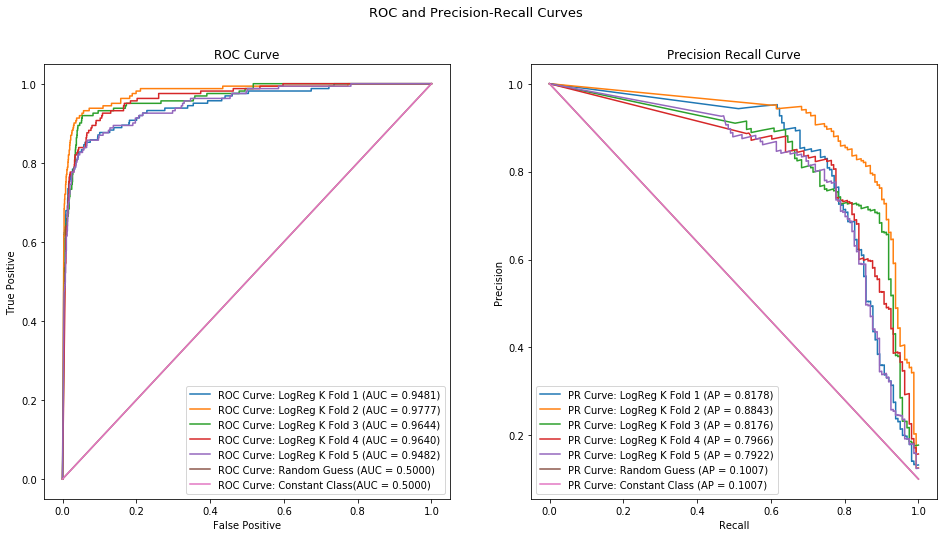

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import Grid

from sklearn.metrics import roc_curve,auc,precision_recall_curve,average_precision_score
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression


#################################### d. Test with cross-validation - logreg

# Instantiate plot

fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.set_figheight(8)


# Cross-val split
cross_val_set = StratifiedKFold(n_splits=5)

######### Classifier #1 : Logistic Regression
i = 0
for train, test in cross_val_set.split(X_train, y_binary_train):
    logreg = LogisticRegression()
    fit = logreg.fit(X_train[train], y_binary_train[train])
    y_probs = fit.predict_proba(X_train[test])
   
    # ROC
    falsepos, truepos, thresh = roc_curve(y_binary_train[test], y_probs[:, 1])
    roc_auc = auc(falsepos, truepos)
    axs[0].plot(falsepos, truepos, label='ROC Curve: LogReg K Fold {0} (AUC = {1:0.4f})'.format(i+1, roc_auc))
    
    # Precision-Recall
    precision, recall, thresh = precision_recall_curve(y_binary_train[test], y_probs[:, 1])
    average_precision = average_precision_score(y_binary_train[test], y_probs[:, 1])
    axs[1].plot(recall, precision, label='PR Curve: LogReg K Fold {0} (AP = {1:0.4f})'.format(i+1, average_precision))

    i += 1

######### Classifier #2 : Random Guess Classification

# Create random classifier
randomguess = DummyClassifier(strategy = 'uniform')
randomFit = randomguess.fit(X_train, y_binary_train)
random_y_probs_list = randomguess.predict_proba(X_train[test]) 
random_y_probs = np.asarray(random_y_probs_list)
random_y_probs2 = np.reshape(random_y_probs,(1599,-1))

# ROC
falsepos, truepos, thresh = roc_curve(y_binary_train[test], random_y_probs2[:,[1]])
roc_auc = auc(falsepos, truepos)
axs[0].plot(falsepos, truepos, label='ROC Curve: Random Guess (AUC = {:0.4f})'.format(roc_auc))

# Precision-Recall
precision, recall, thresh = precision_recall_curve(y_binary_train[test], random_y_probs2[:,[1]])
average_precision = average_precision_score(y_binary_train[test], random_y_probs2[:,[1]])
axs[1].plot(recall, precision, label='PR Curve: Random Guess (AP = {:.4f})'.format(average_precision))

######### Classifier #3 : Constant Class Classification

constantguess = DummyClassifier(strategy = 'constant', constant = [0])
constantFit = constantguess.fit(X_train, y_binary_train)
constant_y_probs_list = constantFit.predict_proba(X_train[test]) 
constant_y_probs = np.asarray(constant_y_probs_list)
constant_y_probs2 = np.reshape(constant_y_probs,(1599,-1))

# ROC
falsepos, truepos, thresh = roc_curve(y_binary_train[test], constant_y_probs2[:,[1]])
roc_auc = auc(falsepos, truepos)
axs[0].plot(falsepos, truepos, label='ROC Curve: Constant Class(AUC = {:0.4f})'.format(roc_auc))

# Precision-Recall
precision, recall, thresh = precision_recall_curve(y_binary_train[test], constant_y_probs2[:,[1]])
average_precision = average_precision_score(y_binary_train[test], constant_y_probs2[:,[1]])
axs[1].plot(recall, precision, label='PR Curve: Constant Class (AP = {:.4f})'.format(average_precision))

######## Plot all

axs[0].set_xlabel('False Positive')
axs[0].set_ylabel('True Positive')
axs[0].legend(loc="lower right")
axs[0].set_title('ROC Curve')


axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].legend(loc="lower left")
axs[1].set_title('Precision Recall Curve')

plt.suptitle('ROC and Precision-Recall Curves', fontsize=13)
plt.show()

In general, the classifier seems to be doing quite well. The average AUC is 0.96, and the average average precision is 0.8217. Not only does it seem to clearly out perform the random guess or constant class classifiers, the high values indicate a quality classifier in its own right. 

There does not seem to be any correlation with an increase in AUC or Average Precision with increase or decrease of fold number. It is understandable, and assumed, that the fold with the highest AUC has the highest average precision (fold 2). In regards to the lowest metrics, fold 1 has the lowest AUC, but fold 5 has the lowest average precision. 


**(f)** Lasso regularization implementation and paramater evaluation.

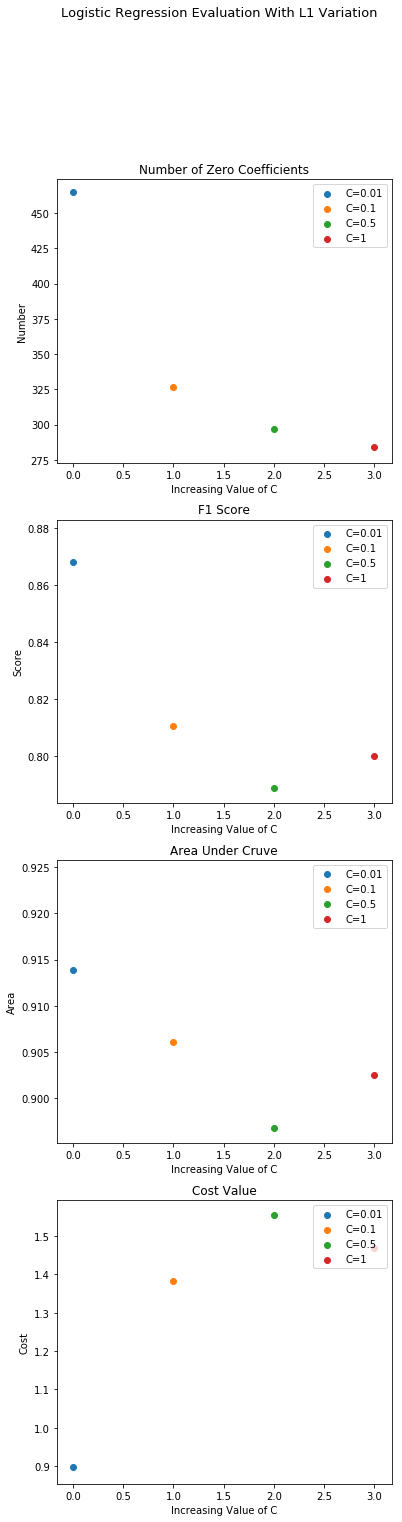

In [132]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import Grid

from sklearn.metrics import roc_curve,auc,roc_auc_score,precision_recall_curve,average_precision_score,f1_score,log_loss
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model.logistic import _logistic_loss


#################################### d. Test with cross-validation - logreg


######### Classifier: Logistic Regression l1, c=0.1
# logreg = LogisticRegression(penalty='l1',C=0.01)
# fit = logreg.fit(X_train, y_binary_train)
# y_probs = fit.predict(X_test)

# Count number of coefficients = 0
# num_zeros = ((fit.coef_) == 0).sum()

# Get F1 Score
# f1 = f1_score(y_binary_test, y_probs)

# Get AUC
# auc = roc_auc_score(y_binary_test, y_probs)

# Cost Function
# Updated from Q1 - use log_loss for updated speed

#def cost_function(coeffs, ytrain):
   # n = ytrain.size
   # classes = [0.0,1.0]
   # yhat = y_probs.tolist()
   # c1 = []
   # c2 = []
    #for x in yhat:
      #  class1Cost = -1*classes*np.log(yhat)
      #  c1.append(class1Cost)
       # class2Cost = (1-classes)*np.log(1-hat)
       # c2.append(class2Cost)
    #avgCost = (sum(c1)+sum(c2))/n
    #print(avgCost)



# Instantiate plot
fig, axs = plt.subplots(4,1)
fig.set_figwidth(6)
fig.set_figheight(24)

c = [0.01, 0.1, 0.5, 1]

for x in range(0,len(c)):
    logreg = LogisticRegression(penalty='l1',C=c[x])
    fit = logreg.fit(X_train, y_binary_train)
    y_probs = fit.predict(X_test)
    num_zeros = ((fit.coef_) == 0).sum()
    f1 = f1_score(y_binary_test, y_probs)
    auc = roc_auc_score(y_binary_test, y_probs)
    cost = log_loss(y_binary_test, y_probs)
    axs[0].scatter(x,num_zeros, label = 'C={}'.format(c[x]))
    axs[1].scatter(x,f1, label = 'C={}'.format(c[x]))
    axs[2].scatter(x,auc, label = 'C={}'.format(c[x]))
    axs[3].scatter(x,cost, label = 'C={}'.format(c[x]))

axs[0].set_xlabel('Increasing Value of C')
axs[0].set_ylabel('Number')
axs[0].legend(loc="upper right")
axs[0].set_title('Number of Zero Coefficients')


axs[1].set_xlabel('Increasing Value of C')
axs[1].set_ylabel('Score')
axs[1].legend(loc="upper right")
axs[1].set_title('F1 Score')

axs[2].set_xlabel('Increasing Value of C')
axs[2].set_ylabel('Area')
axs[2].legend(loc="upper right")
axs[2].set_title('Area Under Cruve')


axs[3].set_xlabel('Increasing Value of C')
axs[3].set_ylabel('Cost')
axs[3].legend(loc="upper right")
axs[3].set_title('Cost Value')

plt.suptitle('Logistic Regression Evaluation With L1 Variation', fontsize=13)
plt.show()

As C increases:
- The number coefficients that are 0 decrease
- The F1 scores and AUC values slightly decrease at first, then slightly increase after a certain point
- The cost function results in an inverse shape of the F1/AUC values, with a increase up to a certain point, and then slight decrease

##  Supervised Learning Exploration

Goal: to construct and implement a supervised learning problem solution/experiment. 

*Identify a question or problem that's of interest, formulate supervised learning question, identify which learning technique to use, and run the analysis.*


**(a)**:
For this supervised learning analysis, I will be exploring the longevity of NBA players based on a variety of statistics. I've had a strong interest in the league for quite some time, and as oppose to enjoying game play, I am more interested in the business decisions and trades made based on player projections. The dataset I am using, which was obtained from data.world, has 19 statistics of 1340 players, and a response variable of whether or not they stayed in the league for at least 5 years. 

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import Grid

# Import NBA data
print('b. Quick view of data below \n')
df = pd.read_csv('https://query.data.world/s/7oh4lz2ww6cdy3doeldmfv23hishws')
df.head()

b. Quick view of data below 



,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


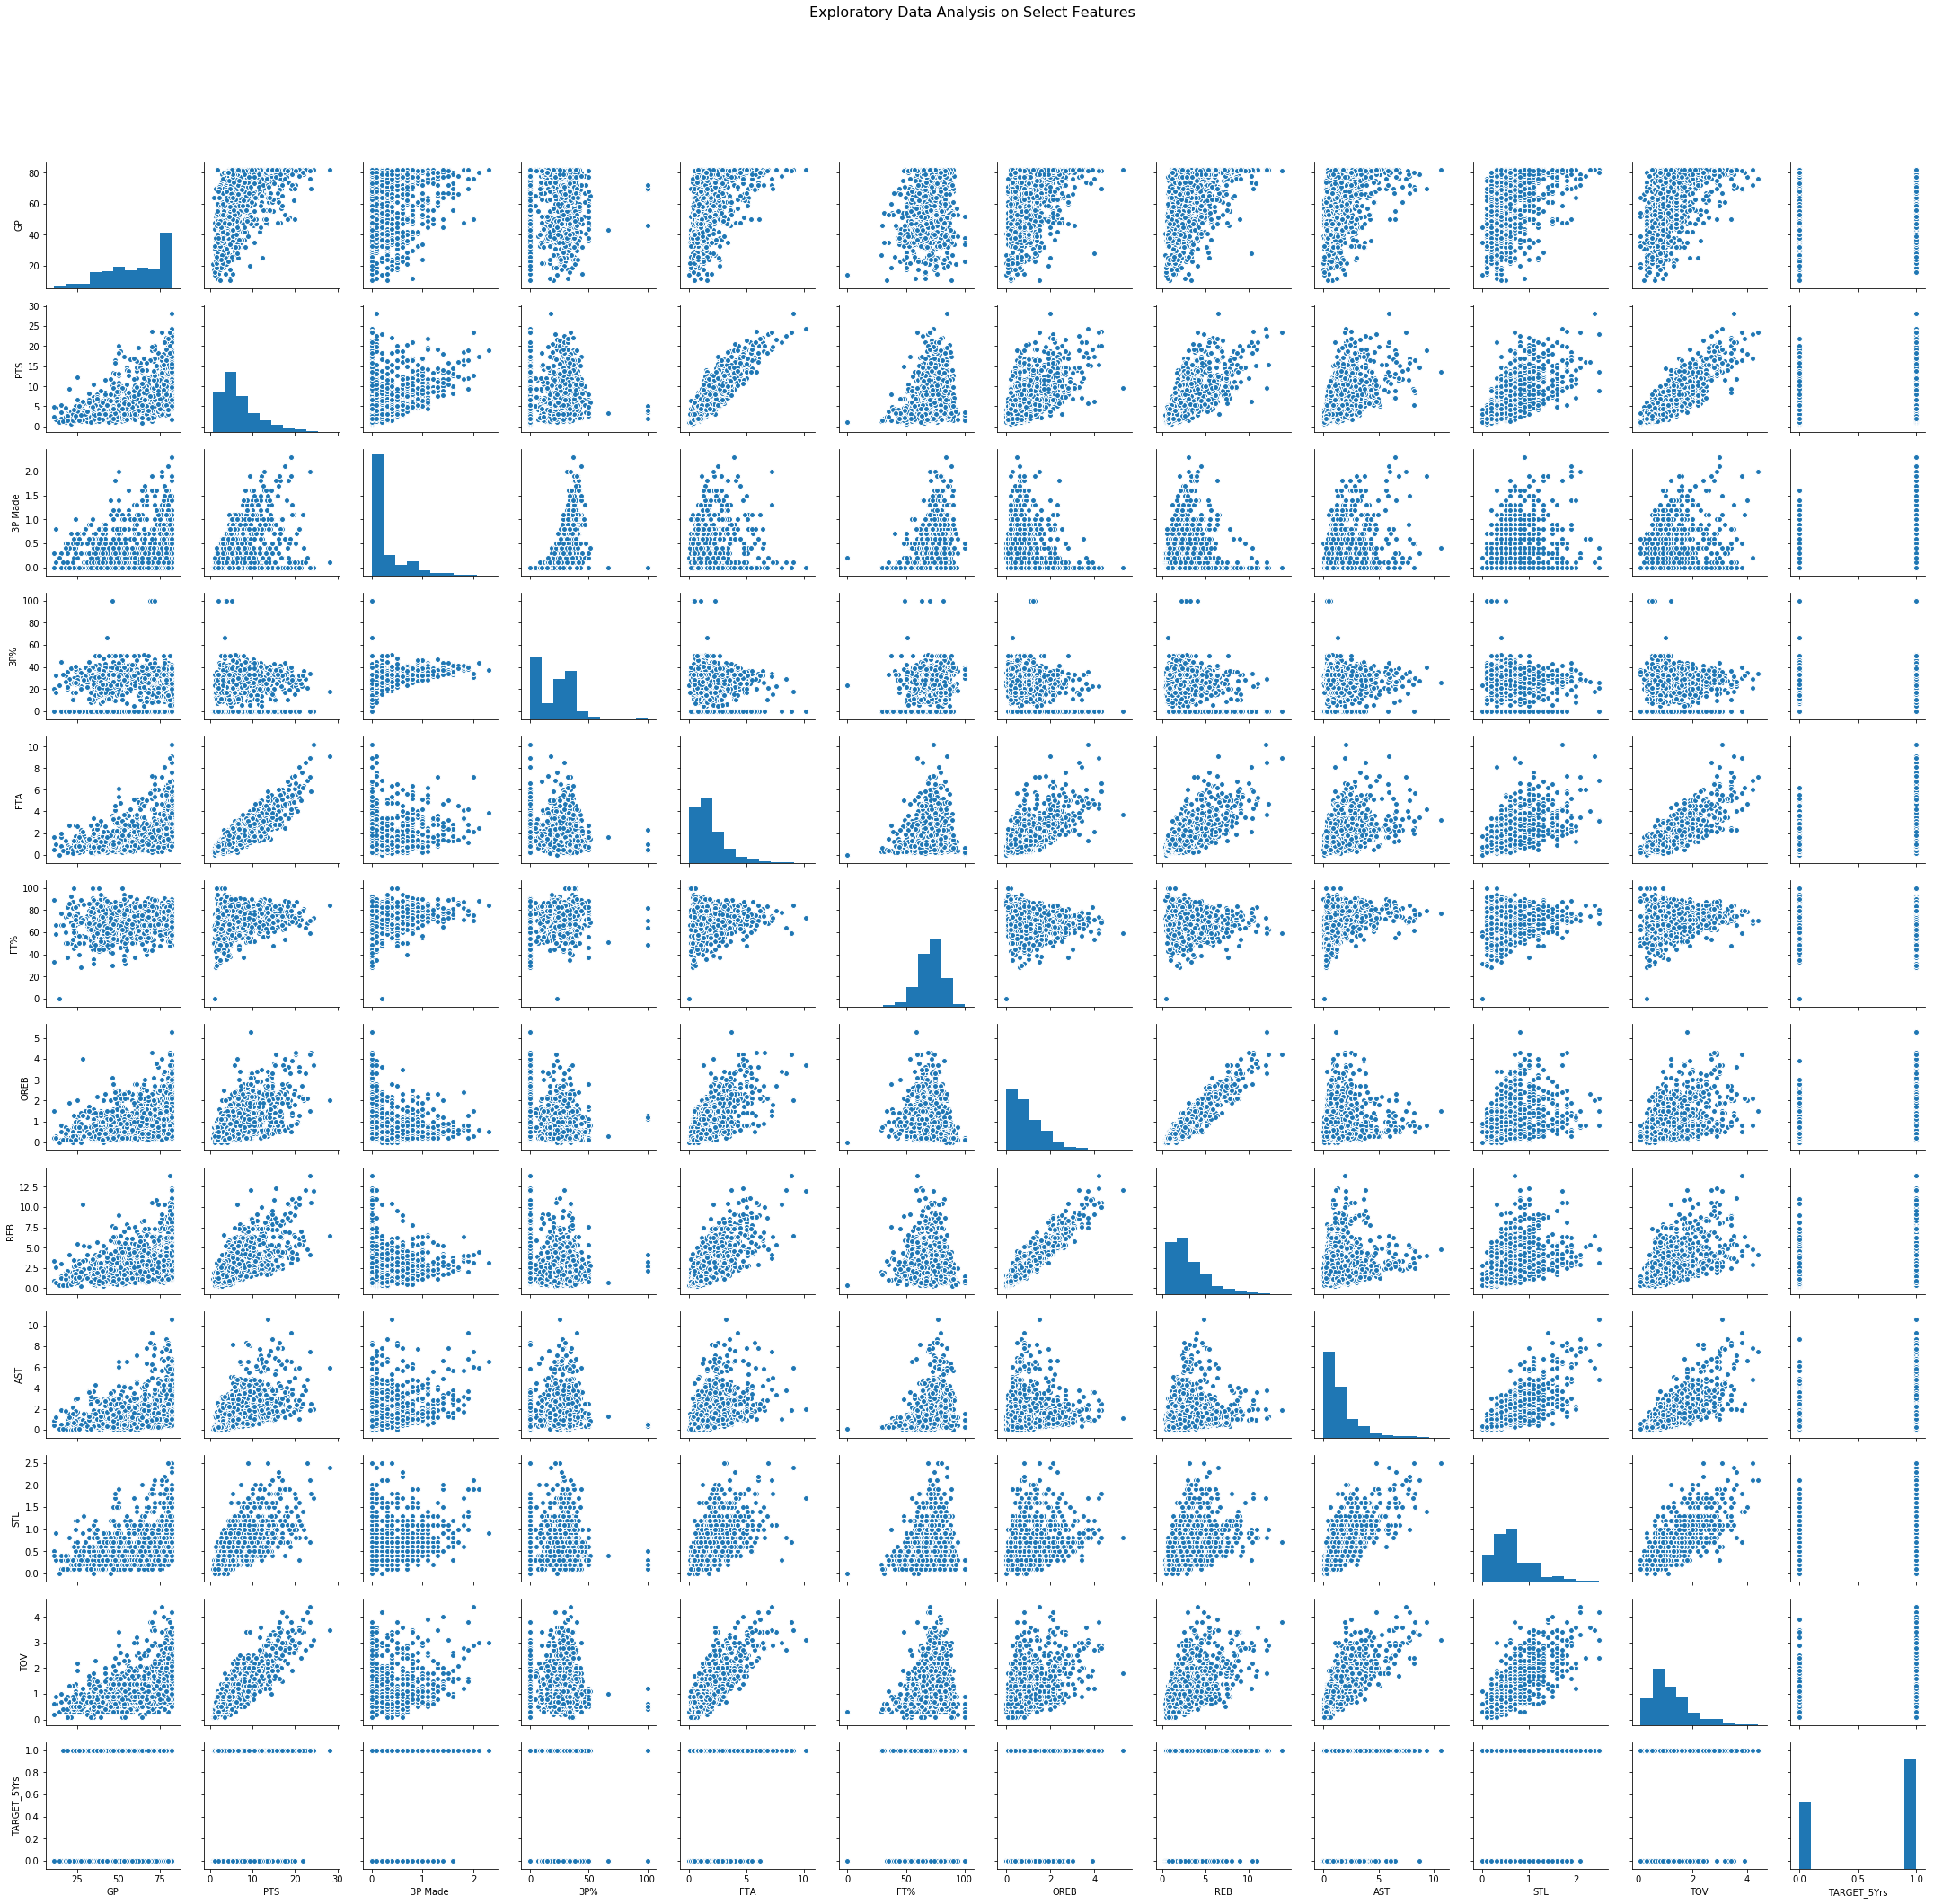

In [33]:
# Set graphing values: remove first and last column
df2 = df.drop(df.columns[[0, -1]], axis=1)
 
# Drop NA values
df2 = df.dropna()

# Select certain features
df3 = df2.drop(df.columns[[0, 2,4,5,6,8,10,14,18]], axis=1)

# Set colnames
col_names = list(df3)

# Pairplot
g= sns.pairplot(df3)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Exploratory Data Analysis on Select Features', fontsize=16)
g

**(b)**  As seen in the above pairplot, there seems to be certain areas of clustering in the 1-1 relationships between variables. Some of the variables certainly seem correlated, but removing them at this juncture does not seem necessary. 

**(c)** The question for this data is can we predict whether, based on numerous statistics gained during a player's rookie year, said player will be in the league 5 years after starting? Playing in the NBA causes understandable strain, both physically and emotionally, and there could be some indication that if a player's stats are exemplary in their first few years, they could be wearing their bodies down and decreasing their shot at longevity. 

To plot the data previously, NA values were removed, for which there were 11 rows. Additionally, when reviewing the data, there were quite a few duplicate players, who will also be removed. The data is normalized per statistic. 

In [34]:
## Remove NAs
df.isnull().sum().sum()
df2 = df.dropna()

# Drop duplicates
nba = df2.drop_duplicates(['Name'], keep='last')

# Convert to numpy
nba2 = nba.values
nba2

# Set predictor values (first columns, removing name) to X, and response (last column) to y
nba_predictors = nba2[:, 1:-1]
nba_target = nba2[:, -1]
nba_target = nba_target.astype(int)

**(d)** For this supervised learning problem, I will be using a k Nearest Neighbour classifier. In this instance, I feel that kNN makes sense, as many basketball analysis often compare or project rookie's "ceilings" in reference to those who have been in the league for quite some time. Using nearest neighbour classification seems to fit that sort of analysis, and is something of interest. Additionally, I'd like more practice with kNN, especially in regards to a larger number of features. 

**(e&f)** Regarding performance, I will both choose K and evaluate performance using misclassification error. Regarding how the split will occur, I will split the data with a 70/30 train/test split due to the size of the data at hand.  

g. Running analysis with training and test data; MCE plot and optimal K below.


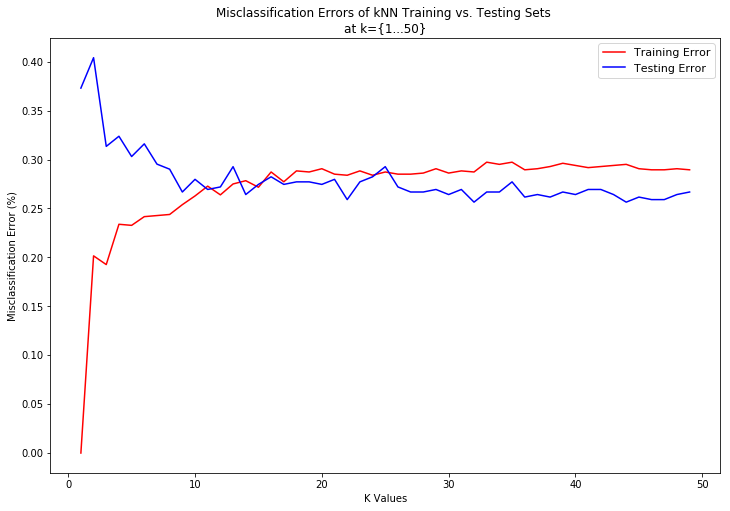

K with Lowest Test MCE Score is 32 with MCE 0.267. 


In [48]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

print('g. Running analysis with training and test data; MCE plot and optimal K below.')


np.random.seed(0)

# Split data - 70/30
X_train, X_test, y_train, y_test = train_test_split(nba_predictors, nba_target, test_size=0.3)

# Create kNN Classifier
# Create set of k-values and initialize misclassification error (MCE) train/test score lists
k_values=range(1,50)
MCE_train_scores=[]
MCE_test_scores=[]

# Instantiate model
k_nn=KNeighborsClassifier()

# Create K loop
for k in k_values: 
    k_nn.n_neighbors=k 
    k_nn.fit(X_train, y_train)
    train_score=k_nn.score(X_train, y_train)
    MCEtrain_score = 1- train_score
    test_score=k_nn.score(X_test, y_test)
    MCEtest_score = 1- test_score
    MCE_train_scores.append(MCEtrain_score)
    MCE_test_scores.append(MCEtest_score)

# Create plot of training vs. testing MCE
plt.figure(figsize=(12, 8))
plt.title('Misclassification Errors of kNN Training vs. Testing Sets \nat k={1...50}')
plt.plot(k_values,MCE_train_scores, color='red',label='Training Error')
plt.plot(k_values,MCE_test_scores, color='blue',label='Testing Error')
plt.legend(loc='upper right', fontsize = 11)
plt.xlabel('K Values')
plt.ylabel('Misclassification Error (%)')  
plt.show()

minK = k_values[MCE_test_scores.index(min(MCE_test_scores))]
minMCE = MCE_test_scores[minK]

print('K with Lowest Test MCE Score is {} with MCE {:.3f}. '.format(minK, minMCE))

**(h)** The classifier found the K=32 that has the lowest test misclassification error rate. The classifier performed well in regard to the assumptions and knowledge about the shapes and directions of the test and training MCEs. To improve upon this analysis, one could:
- Use cross-validation instead of a training/test split to get a more accurate reading
- Perform feature selection in regard to those variables that are highly correlated
- Potentially try a different classifier, such as logistic regression, to obtain information about the importance of features and how different aspects of a player's game can impact their longevity
- Include data from each player's college career

**(i)** Summary of NBA Player Longevity Classification Analysis:
- Obtained game-play statistics of 1284 players during their rookie years to predict whether or not they would still be playing in the NBA in 5 years. 
- 19 predictors were taken into account, such as number of games played, attempts and successes of three pointers, field goals, and free throws, and rebounds. 
- Classification was done using a kNearestNeighbour classifier, and finding the value of k in which the test misclassification error was the lowest.
- Optimal K value was 32, with a misclassification error of approximately 27%, leading us to believe a classification success rate of 73%. 